### Planetary Orbit in Newtonian Gravity

The Lagrangian is given by :

$$ \mathcal{L}=\dfrac{1}{2}m(\dot{r}^2+r^2\dot{\phi}^2)+\dfrac{GMm}{r} $$

Using Euler-Lagrangian equation for the $ \phi $ coordinate, we get a constant of motion, $L=r^2\dot{\phi}$. This quantity is known as the specific angular momentum of the test particle.
Next, for the radial coordinate $r$, we get the equation :

$$ \ddot{r}=\dfrac{L^2}{r^3}-\dfrac{GM}{r} $$

Now, we make the change of variable as : $ u(r)= 1/r$. Then, 

$$ \dot{r}=-u'L $$
and $$ \ddot{r}=-L^2u''u^2 $$

Using above equations we get the ODE :

$$ u''+u=\dfrac{GM}{L^2} $$

To solve this ODE numerically, we shall write it as two couples first order ODEs as below :

$$ \dot{u}=v $$
$$ \dot{v}=\dfrac{GM}{L^2}-u $$

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Constants
G = 6.67e-11                    # Gravitational constant (m^3/kg/s^2)
M = 2e30                        # Mass of Sun (kg)
AU = 1.496e11                   # Astronomical Unit (m)
L_mercury = 2.7701e15           # Specific angular momentum of Mercury (m^2/s)
merc_per = 0.307499 * AU        # Mercury perihelion (m)

# Angular momentum per unit mass (can be adjusted)
L = L_mercury

In [61]:
# ODE system: y = [u, du/dphi]
def derivatives(_, y):
    u, v = y
    return np.array([v, G * M / L**2 - u])

# RK4 integration step
def rk4_step(f, x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h/2, y + k2/2)
    k4 = h * f(x + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Integrator over angular coordinates
def integrate(f, y0, x_range, h):
    N = len(x_range)
    ys = np.zeros((N, 2))
    y = y0.copy()
    for i, x in enumerate(x_range):
        ys[i] = y
        y = rk4_step(f, x, y, h)
    return ys

In [62]:
# Initial conditions
r0 = 3*merc_per
u0 = 1 / r0
v0 = 0
initial_state = np.array([u0, v0])

In [63]:
# Integration parameters
h = 0.001
n_revolutions = 5
phis = np.arange(0, 2 * np.pi * n_revolutions + h, h)

# Solve ODE
solution = integrate(derivatives, initial_state, phis, h)
u = solution[:, 0]
r = 1 / u / AU  # in AU

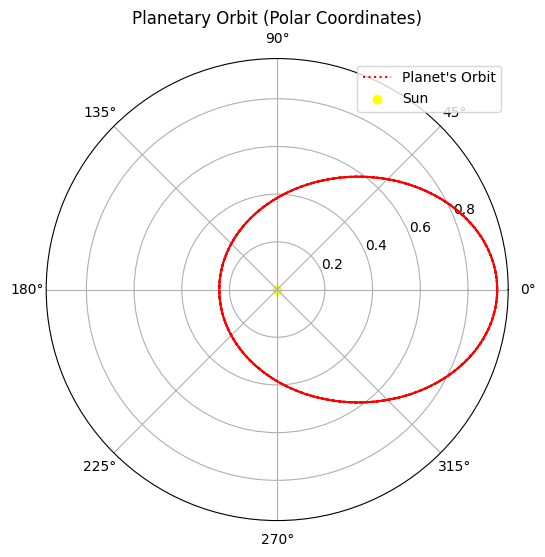

In [64]:
# Cartesian coordinates
x = r * np.cos(phis)
y = r * np.sin(phis)

# Plot polar
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(phis, r, 'r:', label="Planet's Orbit")
ax.scatter(0, 0, c='yellow', label='Sun')
plt.title("Planetary Orbit (Polar Coordinates)")
plt.legend()
plt.show()

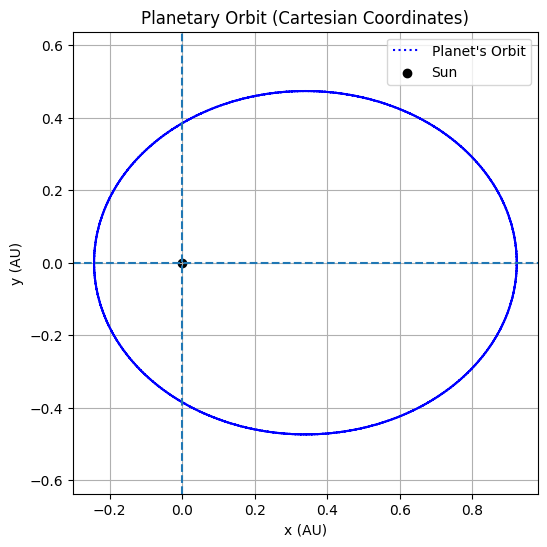

In [65]:
# Plot cartesian
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'b:', label="Planet's Orbit")
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.scatter(0, 0, c='black', label='Sun')
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.title("Planetary Orbit (Cartesian Coordinates)")
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

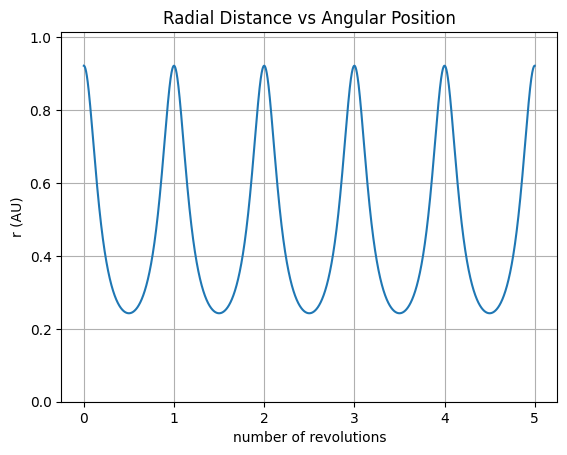

In [66]:
# Plot r vs phi
plt.figure()
plt.plot(phis/2/np.pi, r)
plt.title("Radial Distance vs Angular Position")
plt.xlabel("number of revolutions")
plt.ylabel("r (AU)")
plt.ylim(0,1.1*max(r))
plt.grid()
plt.show()
